In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.svm import SVC
import time
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
#read data 
traindata = pd.read_csv("adult.data",names=['age','workclass','fnlwgt','education',' education-num',
'marital_status','occupation','relationship','race','sex',
'capital-gain','capital-loss','hours-per-week','native_country','income'])
testdata = pd.read_csv("adult.test",names=['age','workclass','fnlwgt','education',' education-num',
'marital_status','occupation','relationship','race','sex',
'capital-gain','capital-loss','hours-per-week','native_country','income'],skiprows=1)

In [3]:
start_time = time.time() #start time

In [4]:
#delete the empty column
traindata = traindata.replace(' ?', np.nan).dropna()
testdata = testdata.replace(' ?', np.nan).dropna()

In [5]:
testdata['income'] = testdata.income.replace({' <=50K.': ' <=50K', ' >50K.': ' >50K'})

In [6]:
for feature in traindata.columns: # Loop through all columns in the dataframe
    if traindata[feature].dtype == 'object': # Only apply for columns with categorical strings
        traindata[feature] = pd.Categorical(traindata[feature]).codes # Replace strings with an integer
for feature in testdata.columns: # Loop through all columns in the dataframe
    if testdata[feature].dtype == 'object': # Only apply for columns with categorical strings
        testdata[feature] = pd.Categorical(testdata[feature]).codes # Replace strings with an integer

In [7]:
#reindex the dataframe
newindex = range(len(traindata))
traindata['c'] = newindex
traindata = traindata.set_index('c')

In [8]:
#split label and data
trainlabel = traindata.pop('income')
testlablel = testdata.pop('income')

In [9]:
#standardizing the data
traindata = scale(traindata)
testdata = scale (testdata)

/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':
/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


In [10]:
#define the svm classifier 
clf = SVC(gamma='auto',probability=True)

In [11]:
kf = KFold(n_splits=10,shuffle=False) #10 fold
for train,test in kf.split(traindata):
    Train_Set = traindata[train]  #train dataset
    TrainLabel = (trainlabel[train])#trainlabel
    Test_Set = traindata[test]#test dataset
    TestLabel = trainlabel[test] #testlabel
    clf.fit(Train_Set, TrainLabel) # train the classifier
    predict_label = clf.predict(Test_Set)  #predict 
    cm = confusion_matrix(TestLabel, predict_label) # confusion matrix
    print (classification_report(TestLabel, predict_label)) #print the precision recall and f1
    print('accuracy:',accuracy_score(TestLabel, predict_label)) #print accuracy 
    print(cm)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2236
           1       0.74      0.53      0.62       781

   micro avg       0.83      0.83      0.83      3017
   macro avg       0.80      0.73      0.76      3017
weighted avg       0.82      0.83      0.82      3017

accuracy: 0.8306264501160093
[[2089  147]
 [ 364  417]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2289
           1       0.75      0.55      0.63       728

   micro avg       0.85      0.85      0.85      3017
   macro avg       0.81      0.75      0.77      3017
weighted avg       0.84      0.85      0.84      3017

accuracy: 0.8471992045077892
[[2156  133]
 [ 328  400]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      2309
           1       0.74      0.56      0.64       707

   micro avg       0.85      0.85      0.85      3016
   macro avg    

In [12]:
print("--- %s seconds ---" % (time.time() - start_time)) #runtime

--- 873.1590149402618 seconds ---


In [13]:
#predict the data and print result
predict_test = clf.predict(testdata) 
cm = confusion_matrix(testlablel, predict_test)
print (classification_report(testlablel, predict_test))
print('accuracy:',accuracy_score(testlablel, predict_test))
print(cm)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11360
           1       0.75      0.55      0.64      3700

   micro avg       0.85      0.85      0.85     15060
   macro avg       0.81      0.75      0.77     15060
weighted avg       0.84      0.85      0.84     15060

accuracy: 0.8451527224435591
[[10695   665]
 [ 1667  2033]]


AUC Score : 0.887821


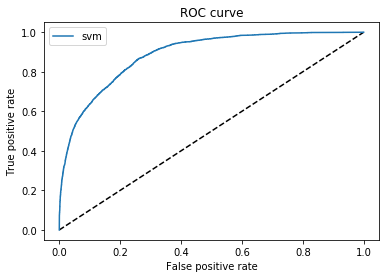

In [14]:
# calculate the auc score and draw the roc curve
y_pred_rf = clf.predict_proba(testdata)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(testlablel, y_pred_rf)
print("AUC Score : %f" %roc_auc_score(testlablel, y_pred_rf))
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='svm')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()